# Modelo: XGBoost com Tf-Idf

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [2]:
def calc_metricas(obs, pred):
    r2 = metrics.r2_score(obs, pred).round(3)
    mape = (100 * metrics.mean_absolute_percentage_error(obs, pred)).round(3)
    mae = metrics.mean_absolute_error(obs, pred).round(2)
    rmse = (metrics.mean_squared_error(obs, pred)**0.5).round(2)
    msle = metrics.mean_squared_log_error(obs, pred).round(3)
    
    return [r2, mape, mae, rmse, msle]

def print_avaliacao(obs, pred):
    print('R² = %.3f' % metrics.r2_score(obs, pred))
    print('MAPE = %.3f %%' % (100 * metrics.mean_absolute_percentage_error(obs, pred)))
    print('MAE = U$S %.2f' % (metrics.mean_absolute_error(obs, pred)))
    print('RMSE = U$S %.2f' % metrics.mean_squared_error(obs, pred)**0.5)
    print('MSLE = %.3f' % metrics.mean_squared_log_error(obs, pred))


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def prep_text(text):
    try:
        tokens = word_tokenize(text)
        words = [word.lower() for word in tokens if word.isalpha()]
        words = [word for word in words if not word in stop_words]
    except:
        return None
    return ' '.join(words)

In [4]:
dados_treino = pd.read_csv('../data/processed/train_data.csv')
dados_teste = pd.read_csv('../data/processed/test_data.csv')

In [5]:
dados_treino.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11


## Preparação das colunas de texto

In [6]:
dados_treino.columns

Index(['name', 'category_1', 'category_2', 'category_3', 'item_condition_id',
       'brand_name', 'price', 'shipping', 'item_description', 'date', 'stock'],
      dtype='object')

In [7]:
#dados_treino = dados_treino[['category_1', 'name', 'item_description', 'price']]
dados_treino.loc[:, 'name'] = dados_treino.apply(lambda x: prep_text(x['name']), axis=1)
dados_treino.loc[:, 'item_description'] = dados_treino.apply(lambda x: prep_text(x['item_description']), axis=1)
dados_treino['comb_name_description'] = dados_treino['brand_name'] + ' ' + dados_treino['name'] + ' ' + dados_treino['item_description']
# dados_treino.dropna(inplace=True)

#dados_teste = dados_teste[['category_1', 'name', 'item_description', 'price']]
dados_teste.loc[:, 'name'] = dados_teste.apply(lambda x: prep_text(x['name']), axis=1)
dados_teste.loc[:, 'item_description'] = dados_teste.apply(lambda x: prep_text(x['item_description']), axis=1)
dados_teste['comb_name_description'] = dados_teste['brand_name'] + ' ' + dados_teste['name'] + ' ' + dados_teste['item_description']

In [ ]:
bdpad

In [ ]:
dados_treino.to_csv('dados_treino_xgboost_categorizado.csv', index=False)
dados_teste.to_csv('dados_teste_xgboost_categorizado.csv', index=False)

## Modelo geral usando comb_name_description

In [ ]:
dados_treino.columns

Index(['name', 'category_1', 'category_2', 'category_3', 'item_condition_id',
       'brand_name', 'price', 'shipping', 'item_description', 'date', 'stock',
       'comb_name_description'],
      dtype='object')

In [ ]:
dados_treino['col_att'] = dados_treino['category_1'] + '-' + dados_treino['shipping'].astype(str)
dados_treino1 = dados_treino[['col_att', 'comb_name_description', 'price']]
dados_treino1.dropna(inplace=True)

dados_teste['col_att'] = dados_teste['category_1'] + '-' + dados_teste['shipping'].astype(str)
dados_teste1 = dados_teste[['col_att', 'comb_name_description', 'price']]
dados_teste1.dropna(inplace=True)

dados_treino1.to_csv('dados_treino_xgboost_categorizado.csv', index=False)
dados_teste1.to_csv('dados_teste_xgboost_categorizado.csv', index=False)

/tmp/ipykernel_10125/915829046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treino1.dropna(inplace=True)
/tmp/ipykernel_10125/915829046.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste1.dropna(inplace=True)


## Modelo por categoria usando comb_name_description

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [ ]:
dados_treino.col_att.value_counts()

Women-0                     282493
Women-1                     182319
Beauty-1                     88344
Kids-0                       70941
Beauty-0                     56717
Electronics-1                50083
Kids-1                       49242
Men-0                        42963
Electronics-0                35764
Home-0                       33922
Men-1                        22469
Vintage & Collectibles-1     18391
Other-1                      17077
Other-0                      14690
Vintage & Collectibles-0     14428
Home-1                       13475
Handmade-1                   13308
Sports & Outdoors-0           9931
Handmade-0                    8405
Sports & Outdoors-1           7789
No category-0                 2778
No category-1                 1633
Name: col_att, dtype: int64

In [ ]:
dados_teste.col_att.value_counts()

Women-0                     121327
Women-1                      77851
Beauty-1                     38313
Kids-0                       30407
Beauty-0                     24351
Electronics-1                21561
Kids-1                       20965
Men-0                        18489
Electronics-0                15224
Home-0                       14598
Men-1                         9688
Vintage & Collectibles-1      7563
Other-1                       7220
Other-0                       6342
Vintage & Collectibles-0      6137
Home-1                        5836
Handmade-1                    5567
Sports & Outdoors-0           4181
Handmade-0                    3555
Sports & Outdoors-1           3421
No category-0                 1233
No category-1                  670
Name: col_att, dtype: int64

In [ ]:
import pickle

for category in dados_treino.col_att.unique():
    X_treino = dados_treino1.query(f'col_att == "{category}"')['comb_name_description']
    tfidf = TfidfVectorizer(min_df=10,
                            max_df=0.6,
                            ngram_range=(1,2))
    X_treino = tfidf.fit_transform(X_treino)
    
    with open(f'{category}.pickle', 'wb') as handle:
        pickle.dump(X_treino, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
dados_treino2 = dados_treino1[dados_treino1.price <= dados_treino1.price.std()*3]

In [ ]:
modelos = {}

for category in dados_treino1.col_att.unique():
    pipe = Pipeline([('tfidf', TfidfVectorizer(min_df = 10, 
                                               max_df = 0.6, 
                                               ngram_range = (1, 2))),
                     ('xgboost', XGBRegressor(random_state=101,
                                              n_jobs=-1,
                                              colsample_bytree=0.8487441436989989,
                                              eta=0.08552417816041906,
                                              grow_policy='lossguide',
                                              max_depth=44,
                                              n_estimators=111,
                                              subsample=0.3430722072083031))
                    ])
    modelos[category] = pipe
    dados_treino2 = dados_treino1.query(f'col_att == "{category}"')
    dados_treino2 = dados_treino2[dados_treino2.price <= dados_treino2.price.std()*3]
    X_treino = dados_treino2['comb_name_description']
    y_treino = np.log(dados_treino2['price'])
    modelos[category].fit(X_treino, y_treino)
    

In [ ]:
with open(f'modelos_s_outliers_categorias.pickle', 'wb') as handle:
    pickle.dump(modelos, handle, protocol=pickle.HIGHEST_PROTOCOL)

colsample_bytree=0.8487441436989989,
                                              eta=0.08552417816041906,
                                              grow_policy='lossguide',
                                              max_depth=44,
                                              n_estimators=111,
                                              subsample=0.3430722072083031

Tempo de treino: 8m 46.4s

In [ ]:
dados_teste1 = dados_teste1.assign(pred=0)

In [ ]:
for category in dados_teste1.col_att.unique():
    index = dados_teste1.query(f'col_att == "{category}"').index
    dados_teste1.loc[index, 'pred'] = np.exp(modelos[category].predict(dados_teste1.loc[index]['comb_name_description']))

dados_teste1.loc[dados_teste1.pred < 3, 'pred'] = 3

Tempo previsão: 25.4s

Avaliação geral

In [ ]:
dados

In [ ]:
print_avaliacao(dados_teste1['price'], dados_teste1['pred'])

R² = 0.230
MAPE = 41.676 %
MAE = U$S 11.64
RMSE = U$S 33.68
MSLE = 0.264


com outliers

R² = 0.393
MAPE = 43.596 %
MAE = U$S 11.18
RMSE = U$S 29.90
MSLE = 0.249

sem outliers

R² = 0.207
MAPE = 41.908 %
MAE = U$S 11.71
RMSE = U$S 34.17
MSLE = 0.265

sem outliers categorizado
R² = 0.230
MAPE = 41.676 %
MAE = U$S 11.64
RMSE = U$S 33.68
MSLE = 0.264


Avaliação por categoria principal

In [ ]:
dados_teste2 = dados_teste1[dados_teste1.price <= dados_teste1.price.std()*3]
dados_teste2.head()

,col_att,comb_name_description,price,pred
0,Women-1,women motorcycle tshirt xl fits like small,6.0,10.485179
1,Women-1,alex ani necklace path life alex ani necklace ...,11.0,10.809405
2,Women-0,steve madden red lace heels never worn true si...,36.0,20.733419
3,Men-0,men black tuxedo worn times single pleated pan...,54.0,19.085636
5,Vintage & Collectibles-0,badtz maru funko pop never opened nib great op...,25.0,24.169821


<AxesSubplot:ylabel='Frequency'>

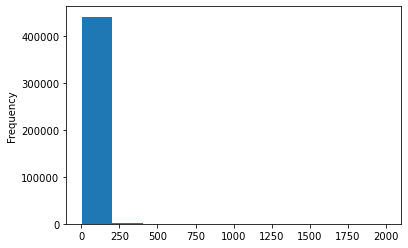

In [ ]:
dados_teste1.price.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

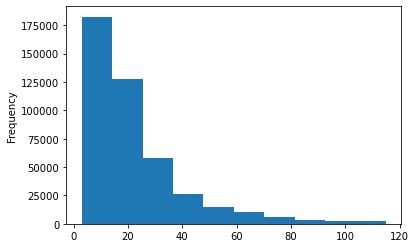

In [ ]:
dados_teste2.price.plot(kind='hist')

In [ ]:
dados_teste.shape, dados_teste2.shape

((444499, 13), (434151, 4))

In [ ]:
dados_teste2 = dados_teste2.assign(pred=0)
dados_teste2.head()

,col_att,comb_name_description,price,pred
0,Women-1,women motorcycle tshirt xl fits like small,6.0,0
1,Women-1,alex ani necklace path life alex ani necklace ...,11.0,0
2,Women-0,steve madden red lace heels never worn true si...,36.0,0
3,Men-0,men black tuxedo worn times single pleated pan...,54.0,0
5,Vintage & Collectibles-0,badtz maru funko pop never opened nib great op...,25.0,0


In [ ]:
for category in dados_teste2.col_att.unique():
    index = dados_teste2.query(f'col_att == "{category}"').index
    dados_teste2.loc[index, 'pred'] = np.exp(modelos[category].predict(dados_teste2.loc[index]['comb_name_description']))

dados_teste2.loc[dados_teste2.pred < 3, 'pred'] = 3

In [ ]:
print_avaliacao(dados_teste2['price'], dados_teste2['pred'])

R² = 0.424
MAPE = 41.025 %
MAE = U$S 8.40
RMSE = U$S 13.88
MSLE = 0.215


sem outliers

R² = 0.439
MAPE = 41.211 %
MAE = U$S 8.36
RMSE = U$S 13.70
MSLE = 0.213

sem ouliers categorizados

R² = 0.424
MAPE = 41.025 %
MAE = U$S 8.40
RMSE = U$S 13.88
MSLE = 0.215

In [ ]:
avaliacoes = {}

for categoria in dados_teste1.category_1.unique():
    dados_cat = dados_teste1.query(f'category_1 == "{categoria}"')
    avaliacoes[categoria] = calc_metricas(dados_cat['price'], dados_cat['pred'])

avaliacoes = pd.DataFrame(avaliacoes, index=['R²', 'MAPE', 'MAE', 'RMSE', 'MSLE'])

avaliacoes

AttributeError: 'DataFrame' object has no attribute 'category_1'